# Scoring notebook

This is the scoring notebook for the data driven competition at CMF 2022. You can change cells with `### YOUR CODE HERE` line, all other cells are read-only. However, you can add new cells to organize your code in a convenient way.

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
import statsmodels.api as sm

Let us load the dataset. Columns in the test (public as well as private) dataset are equivalent to the train dataset.

In [38]:
dataset1 = pd.read_csv('train.zip', index_col=0, header=[0, 1])
dataset1.rename(
    columns={
        'Unnamed: 209_level_1': 'count',
        'Unnamed: 210_level_1': 'price',
    },
    level = 1,
    inplace = True
)
dataset1.head()

timestamp_second bid_price_0                                                \
                     nunique       mean   median       std     min     max   
0                          7  44.183379  44.1865  0.007340  44.171  44.190   
1                          1  44.190000  44.1900  0.000000  44.190  44.190   
2                          3  44.187467  44.1860  0.001767  44.186  44.190   
3                          3  44.181038  44.1860  0.006993  44.173  44.188   
4                          2  44.213095  44.2190  0.012474  44.188  44.219   

timestamp_second                 bid_quantity_0          ...  \
                   first    last            sum nunique  ...   
0                 44.171  44.190        25880.7       5  ...   
1                 44.190  44.190           76.7       1  ...   
2                 44.190  44.186          597.5       3  ...   
3                 44.186  44.188         2062.8       2  ...   
4                 44.188  44.219         6350.8       2  ...   

timestamp_second sell_trade_quantity                                    count  \
                             nunique mean median std min max first last count   
0                                  0  NaN    NaN NaN NaN NaN   NaN  NaN    66   
1                                  0  NaN    NaN NaN NaN NaN   NaN  NaN    13   
2                                  0  NaN    NaN NaN NaN NaN   NaN  NaN    15   
3                                  0  NaN    NaN NaN NaN NaN   NaN  NaN    52   
4                                  0  NaN    NaN NaN NaN NaN   NaN  NaN    21   

timestamp_second    price  
                    price  
0                 44.2005  
1                 44.2195  
2                 44.2195  
3                 44.2175  
4                 44.2060  

[5 rows x 210 columns]

In [52]:
n = len(dataset1)
test = dataset1[n//8:]
dataset = dataset1[:n//8]

In [18]:
def process(feat):
    dataset = feat
    n = len(dataset)
    columns1 = dataset.columns.get_level_values(0).unique()
    bids_weighted_sum = np.zeros(n)
    t = np.zeros(n)
    for i in  range(0,10, 2):
        bids_weighted_sum += dataset[columns1[i]]['mean']*dataset[columns1[i+1]]['sum']
        t+=dataset[columns1[i+1]]['sum']
    bids_weighted_sum/=t
    asks_weighted_sum = np.zeros(n)
    t = np.zeros(n)
    for i in  range(10,19, 2):
        asks_weighted_sum += dataset[columns1[i]]['mean']*dataset[columns1[i+1]]['sum']
        t+=dataset[columns1[i+1]]['sum']
    asks_weighted_sum/=t
    asks_weighted_sum=asks_weighted_sum.values
    bids_weighted_sum=bids_weighted_sum.values
    deltas_bid = [bids_weighted_sum[i]-bids_weighted_sum[i-1] for i in range(1, n)]
    deltas_ask = [asks_weighted_sum[i]-asks_weighted_sum[i-1] for i in range(1, n)]
    deltas_ask.insert(0, 0)
    deltas_bid.insert(0, 0)
    X = np.vstack((asks_weighted_sum, bids_weighted_sum, deltas_ask, deltas_bid)).T
    return X

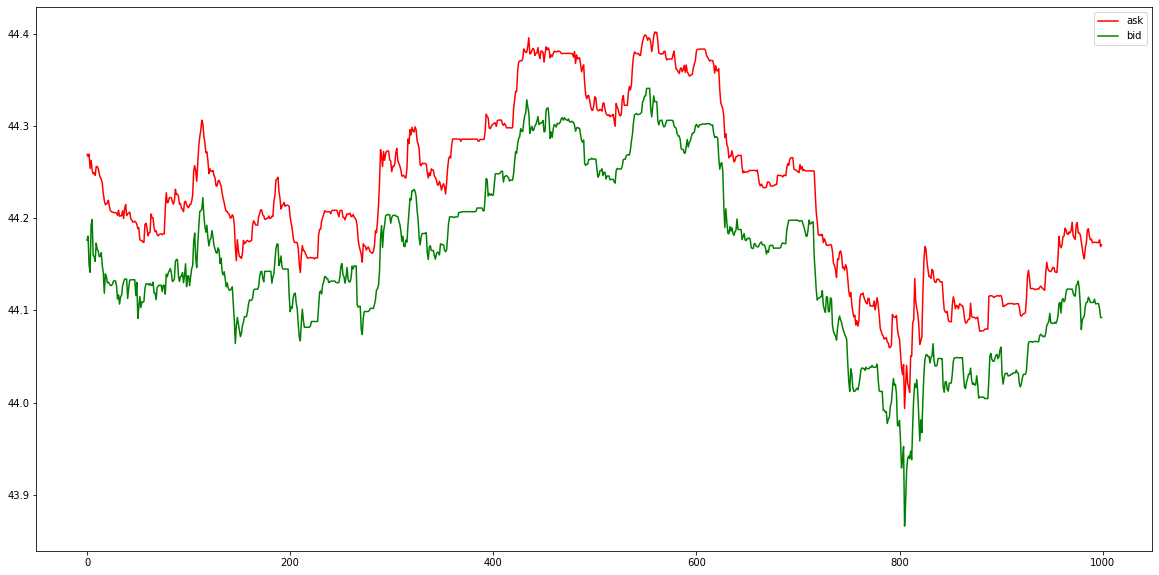

In [175]:
plt.figure(figsize=(20,10))
m = 1000
plt.plot(x[:m],asks_weighted_sum[:m], color = 'r', label = 'ask') 
plt.plot(x[:m],bids_weighted_sum[:m], color = 'green', label = 'bid') 
plt.legend();

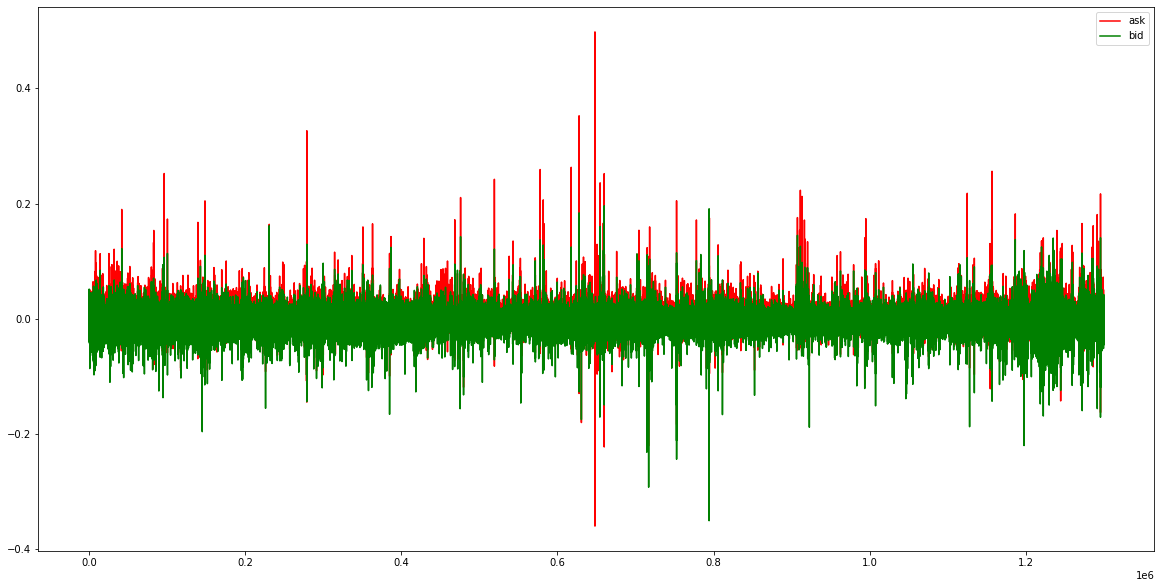

In [181]:
plt.figure(figsize=(20,10))
m = n
plt.plot(x[1:m],deltas_ask[:m], color = 'r', label = 'ask') 
plt.plot(x[1:m],deltas_bid[:m], color = 'green', label = 'bid') 
plt.legend();

In [40]:
test

timestamp_second bid_price_0                                                \
                     nunique       mean   median       std     min     max   
162500                     6  47.774462  47.7745  0.002244  47.771  47.777   
162501                     4  47.782431  47.7780  0.006613  47.777  47.792   
162502                    11  47.797500  47.7950  0.004567  47.792  47.807   
162503                     5  47.797562  47.7920  0.011595  47.784  47.810   
162504                     1  47.784000  47.7840  0.000000  47.784  47.784   
...                      ...        ...      ...       ...     ...     ...   
1299995                    1  30.777000  30.7770  0.000000  30.777  30.777   
1299996                    1  30.777000  30.7770  0.000000  30.777  30.777   
1299997                    5  30.780052  30.7810  0.002787  30.777  30.784   
1299998                    8  30.786015  30.7860  0.003217  30.782  30.793   
1299999                    7  30.804518  30.8065  0.005831  30.793  30.810   

timestamp_second                 bid_quantity_0          ...  \
                   first    last            sum nunique  ...   
162500            47.771  47.777         2635.0       5  ...   
162501            47.777  47.792         2738.6       6  ...   
162502            47.792  47.807        55940.0       5  ...   
162503            47.809  47.784         3622.4       5  ...   
162504            47.784  47.784         1389.0       2  ...   
...                  ...     ...            ...     ...  ...   
1299995           30.777  30.777         1320.0       1  ...   
1299996           30.777  30.777         1020.0       1  ...   
1299997           30.777  30.783         8198.8       7  ...   
1299998           30.783  30.793         8922.4       8  ...   
1299999           30.793  30.810         4273.0       5  ...   

timestamp_second sell_trade_quantity                                    count  \
                             nunique mean median std min max first last count   
162500                             0  NaN    NaN NaN NaN NaN   NaN  NaN    52   
162501                             0  NaN    NaN NaN NaN NaN   NaN  NaN    51   
162502                             0  NaN    NaN NaN NaN NaN   NaN  NaN    84   
162503                             0  NaN    NaN NaN NaN NaN   NaN  NaN    73   
162504                             0  NaN    NaN NaN NaN NaN   NaN  NaN    15   
...                              ...  ...    ...  ..  ..  ..   ...  ...   ...   
1299995                            0  NaN    NaN NaN NaN NaN   NaN  NaN    22   
1299996                            0  NaN    NaN NaN NaN NaN   NaN  NaN    17   
1299997                            0  NaN    NaN NaN NaN NaN   NaN  NaN    58   
1299998                            0  NaN    NaN NaN NaN NaN   NaN  NaN    67   
1299999                            0  NaN    NaN NaN NaN NaN   NaN  NaN    56   

timestamp_second    price  
                    price  
162500            47.7940  
162501            47.7980  
162502            47.8170  
162503            47.8245  
162504            47.8105  
...                   ...  
1299995           30.7995  
1299996           30.7995  
1299997           30.7995  
1299998           30.8120  
1299999           30.8170  

[1137500 rows x 210 columns]

In [198]:
dataset

timestamp_second bid_price_0                                                \
                     nunique       mean   median       std     min     max   
0                          7  44.183379  44.1865  0.007340  44.171  44.190   
1                          1  44.190000  44.1900  0.000000  44.190  44.190   
2                          3  44.187467  44.1860  0.001767  44.186  44.190   
3                          3  44.181038  44.1860  0.006993  44.173  44.188   
4                          2  44.213095  44.2190  0.012474  44.188  44.219   
...                      ...        ...      ...       ...     ...     ...   
162495                     3  47.766900  47.7680  0.001392  47.765  47.768   
162496                     1  47.768000  47.7680  0.000000  47.768  47.768   
162497                     2  47.769667  47.7690  0.001155  47.769  47.771   
162498                     1  47.771000  47.7710       NaN  47.771  47.771   
162499                     1  47.771000  47.7710  0.000000  47.771  47.771   

timestamp_second                 bid_quantity_0          ...  \
                   first    last            sum nunique  ...   
0                 44.171  44.190        25880.7       5  ...   
1                 44.190  44.190           76.7       1  ...   
2                 44.190  44.186          597.5       3  ...   
3                 44.186  44.188         2062.8       2  ...   
4                 44.188  44.219         6350.8       2  ...   
...                  ...     ...            ...     ...  ...   
162495            47.765  47.768         1216.2       4  ...   
162496            47.768  47.768           55.0       1  ...   
162497            47.769  47.771          157.1       2  ...   
162498            47.771  47.771           27.5       1  ...   
162499            47.771  47.771           55.0       1  ...   

timestamp_second sell_trade_quantity                                    count  \
                             nunique mean median std min max first last count   
0                                  0  NaN    NaN NaN NaN NaN   NaN  NaN    66   
1                                  0  NaN    NaN NaN NaN NaN   NaN  NaN    13   
2                                  0  NaN    NaN NaN NaN NaN   NaN  NaN    15   
3                                  0  NaN    NaN NaN NaN NaN   NaN  NaN    52   
4                                  0  NaN    NaN NaN NaN NaN   NaN  NaN    21   
...                              ...  ...    ...  ..  ..  ..   ...  ...   ...   
162495                             0  NaN    NaN NaN NaN NaN   NaN  NaN    40   
162496                             0  NaN    NaN NaN NaN NaN   NaN  NaN     2   
162497                             0  NaN    NaN NaN NaN NaN   NaN  NaN     3   
162498                             0  NaN    NaN NaN NaN NaN   NaN  NaN     1   
162499                             0  NaN    NaN NaN NaN NaN   NaN  NaN     2   

timestamp_second    price  
                    price  
0                 44.2005  
1                 44.2195  
2                 44.2195  
3                 44.2175  
4                 44.2060  
...                   ...  
162495            47.7850  
162496            47.7925  
162497            47.7930  
162498            47.7940  
162499            47.7940  

[162500 rows x 210 columns]

In [313]:
y = dataset['price'][60:]

In [314]:
X = dataset[:-60].fillna(0)

In [315]:
X.shape

(162440, 210)

In [316]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y.values)
reg.score(X, y)

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.9978580826016485

In [305]:
v = np.linspace(1,100,100)

In [312]:
reg.predict([[200]])

array([210.])

In [272]:
y = test['price'][60:]
X = test[:-60].fillna(0)

In [259]:
reg.score(X, y)

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.9994945234297312

In [260]:
class Dataloader():
    def __init__(
        self, 
        dataframe: pd.DataFrame, 
        window_size: int, 
        step_size: int,
        horizon: int,
        first_pred: int
    ):
        self.df = dataframe
        self.window_size = window_size
        self.step_size = step_size
        self.horizon = horizon
        self.first_pred = first_pred
        assert self.first_pred > self.window_size
        feat_idx = []
        target_idx = []
        for i in range(self.first_pred, self.df.shape[0], self.step_size):
            feat_idx.append(range(i-self.horizon-self.window_size+1, i-self.horizon+1))
            target_idx.append(i)
        self.feat_idx = feat_idx
        self.target_idx = target_idx
    
    def __len__(self):
        return len(self.feat_idx)
    
    def __iter__(self):
        self.iter = 0
        return self

    def __next__(self):
        if self.iter < len(self.feat_idx):
            feat = self.df.iloc[self.feat_idx[self.iter]]
            target = self.df.iloc[self.target_idx[self.iter], -1]
            self.iter += 1
            return feat, target
        else:
            raise StopIteration

In [261]:
window_size = 1

In [286]:
test2 = test[-10000:]

In [287]:
loader = Dataloader(
    dataframe=test2, 
    window_size=window_size, 
    step_size=1, 
    horizon=60, 
    first_pred=63)

for feat, target in loader:
    break
feat.shape, target

((1, 210), 28.048)

In [288]:
test2

timestamp_second bid_price_0                                                \
                     nunique       mean   median       std     min     max   
1290000                    4  27.988943  27.9890  0.003029  27.984  27.994   
1290001                    2  27.993783  27.9940  0.001474  27.984  27.994   
1290002                    7  27.991376  27.9900  0.004956  27.984  28.006   
1290003                    9  28.013437  28.0130  0.005160  28.001  28.021   
1290004                    6  28.020500  28.0170  0.007195  28.003  28.029   
...                      ...        ...      ...       ...     ...     ...   
1299995                    1  30.777000  30.7770  0.000000  30.777  30.777   
1299996                    1  30.777000  30.7770  0.000000  30.777  30.777   
1299997                    5  30.780052  30.7810  0.002787  30.777  30.784   
1299998                    8  30.786015  30.7860  0.003217  30.782  30.793   
1299999                    7  30.804518  30.8065  0.005831  30.793  30.810   

timestamp_second                 bid_quantity_0          ...  \
                   first    last            sum nunique  ...   
1290000           27.988  27.994         1458.8       3  ...   
1290001           27.994  27.984         2301.6       2  ...   
1290002           27.984  28.006        15203.2       9  ...   
1290003           28.006  28.015         7748.2       8  ...   
1290004           28.015  28.024         4577.6       4  ...   
...                  ...     ...            ...     ...  ...   
1299995           30.777  30.777         1320.0       1  ...   
1299996           30.777  30.777         1020.0       1  ...   
1299997           30.777  30.783         8198.8       7  ...   
1299998           30.783  30.793         8922.4       8  ...   
1299999           30.793  30.810         4273.0       5  ...   

timestamp_second sell_trade_quantity                                    count  \
                             nunique mean median std min max first last count   
1290000                            0  NaN    NaN NaN NaN NaN   NaN  NaN    35   
1290001                            0  NaN    NaN NaN NaN NaN   NaN  NaN    46   
1290002                            0  NaN    NaN NaN NaN NaN   NaN  NaN   125   
1290003                            0  NaN    NaN NaN NaN NaN   NaN  NaN    96   
1290004                            0  NaN    NaN NaN NaN NaN   NaN  NaN    76   
...                              ...  ...    ...  ..  ..  ..   ...  ...   ...   
1299995                            0  NaN    NaN NaN NaN NaN   NaN  NaN    22   
1299996                            0  NaN    NaN NaN NaN NaN   NaN  NaN    17   
1299997                            0  NaN    NaN NaN NaN NaN   NaN  NaN    58   
1299998                            0  NaN    NaN NaN NaN NaN   NaN  NaN    67   
1299999                            0  NaN    NaN NaN NaN NaN   NaN  NaN    56   

timestamp_second    price  
                    price  
1290000           28.0340  
1290001           28.0340  
1290002           28.0315  
1290003           28.0315  
1290004           28.0315  
...                   ...  
1299995           30.7995  
1299996           30.7995  
1299997           30.7995  
1299998           30.8120  
1299999           30.8170  

[10000 rows x 210 columns]

In [289]:
%%time
pred = []
target = []
for feat, _target in loader:
    pred.append(reg.predict(feat.fillna(0))[0][0])
    target.append(_target)
mse(pred, target)

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

CPU times: user 12.6 s, sys: 699 ms, total: 13.3 s
Wall time: 13.3 s


/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will

0.04787851020323672

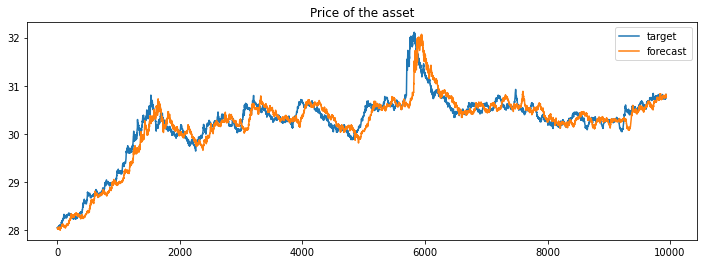

In [290]:
plt.figure(figsize=(12, 4))
plt.plot(target, label='target')
plt.plot(pred, label='forecast')
plt.title('Price of the asset')
plt.legend()
plt.show()

In [192]:
reg.coef_

array([[ 0.99940172,  0.1596217 , -0.00555759]])

In [71]:
columns1 = test.columns.get_level_values(0).unique()

In [99]:
def process2(dataset):
    n = len(dataset)
    bids_weighted_sum = np.zeros(n)
    t = np.zeros(n)
    for i in  range(0,10, 2):
        bids_weighted_sum += dataset[columns1[i]]['mean']*dataset[columns1[i+1]]['sum']
        t+=dataset[columns1[i+1]]['sum']
    bids_weighted_sum/=t
    asks_weighted_sum = np.zeros(n)
    t = np.zeros(n)
    for i in  range(10,19, 2):
        asks_weighted_sum += dataset[columns1[i]]['mean']*dataset[columns1[i+1]]['sum']
        t+=dataset[columns1[i+1]]['sum']
    asks_weighted_sum/=t
    asks_weighted_sum=asks_weighted_sum.values
    bids_weighted_sum=bids_weighted_sum.values
    deltas_bid = [bids_weighted_sum[1]-bids_weighted_sum[0]]
    deltas_ask = [asks_weighted_sum[1]-asks_weighted_sum[0]]

    X = np.vstack((asks_weighted_sum[1], bids_weighted_sum[1], deltas_ask, deltas_bid)).T
    if np.isnan(X).any():
        print(X, dataset)
        return dataset['price'][-1]
    
    return reg.predict(X)[0][0]

In [170]:
def process(dataset):
    n = len(dataset)
    y = dataset['price'].values.reshape([-1])
    print(y[0])
    deltas = [y[i]-y[i-1] for i in range(1, n)]
    conv = [deltas[i]-deltas[i-1] for i in range(1, n-1)]
    deltas.insert(0, 0)
    conv.insert(0, 0)
    conv.insert(0, 0)
    #print(y, deltas, conv)
    X = np.vstack((y, deltas, conv)).T
    return X

In [171]:
def process2(dataset):
    n = len(dataset)
    y = dataset['price'].values.reshape([-1])
    deltas = [y[i]-y[i-1] for i in range(1, n)]
    conv = [deltas[i]-deltas[i-1] for i in range(1, n-1)]
    X = np.vstack((y[-1], deltas[-1], conv[-1])).T
    if np.isnan(X).any():
        print(X, dataset)
        return y[-1]
    return reg.predict(X)[0][0]

In [275]:
y.values[-61]

array([30.7725])

In [244]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [247]:
k*X[-61]+b

array([[1.44134623e+01, 1.63593405e+01, 3.23354857e-03, 4.71029430e-03]])

In [317]:
import json
encoded = json.dumps((reg.coef_.tolist(), reg.intercept_.tolist()))
print(encoded)
decoded = json.loads(encoded)

model2 = LinearRegression()
model2.coef_ = np.array(decoded[0])
model2.intercept_ = np.array(decoded[1])


[[[-0.0005384770380169127, -0.28350132504267106, 0.08173542855532759, -0.3533556673888432, -0.1825023020817937, 0.19240775895771112, 0.05842814654022345, 0.15589184067572892, -4.0010280924040586e-08, -0.0001560418797431816, -1.1194910087140958e-05, 3.531725891823081e-06, 6.363174597578372e-06, 5.507294423097976e-06, 1.14919389001785e-07, 1.3482157335226e-07, 1.6716546249357115e-06, 7.678973521230929e-05, 0.28135131273018776, -0.2471512015056614, 0.05398961536116234, 0.0010020714592310544, -0.103859796766626, 0.05918314572654251, 0.18913103291298525, 3.060710954431653e-08, 6.484978523007157e-05, 8.911404808897676e-07, -2.684842753048096e-06, -5.291599155613728e-06, -3.7812247085189463e-06, 1.5007968579144881e-06, 4.2780210114657085e-07, 1.444703553926674e-06, -0.00038915349018548914, -0.15842798281258108, 0.10941257716815127, 0.7888248655687403, 0.22769343628718924, -0.22593346557065577, 0.061720647968247735, 0.1398139306781656, 1.7677253771886114e-08, 0.00013291539395106355, -3.1147804

In [269]:
model2.predict([[4.41726596e+01, 4.41080710e+01, 1.68673521e-03, 1.57947324e-02]])

array([[44.1411737]])

In [221]:
from sklearn.linear_model import LinearRegression
y = dataset['price']
reg = LinearRegression().fit(y[:-61], y[60:-1])

In [222]:
y.values[-61]

array([30.7725])

In [224]:
reg.predict([y.values[-61]])

/Users/aleksandrkudrasov/mambaforge/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[30.77251583]])

In [226]:
y.values[-1]

array([30.817])

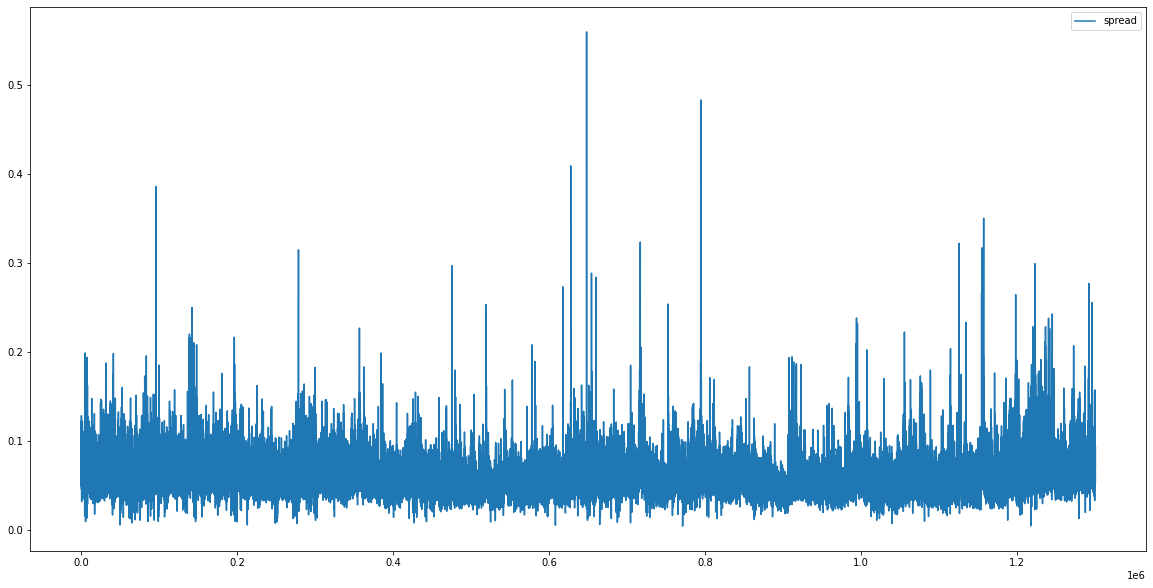

In [161]:
plt.figure(figsize=(20,10))
plt.plot(x,asks_weighted_sum-bids_weighted_sum, label = 'spread') 
plt.legend();

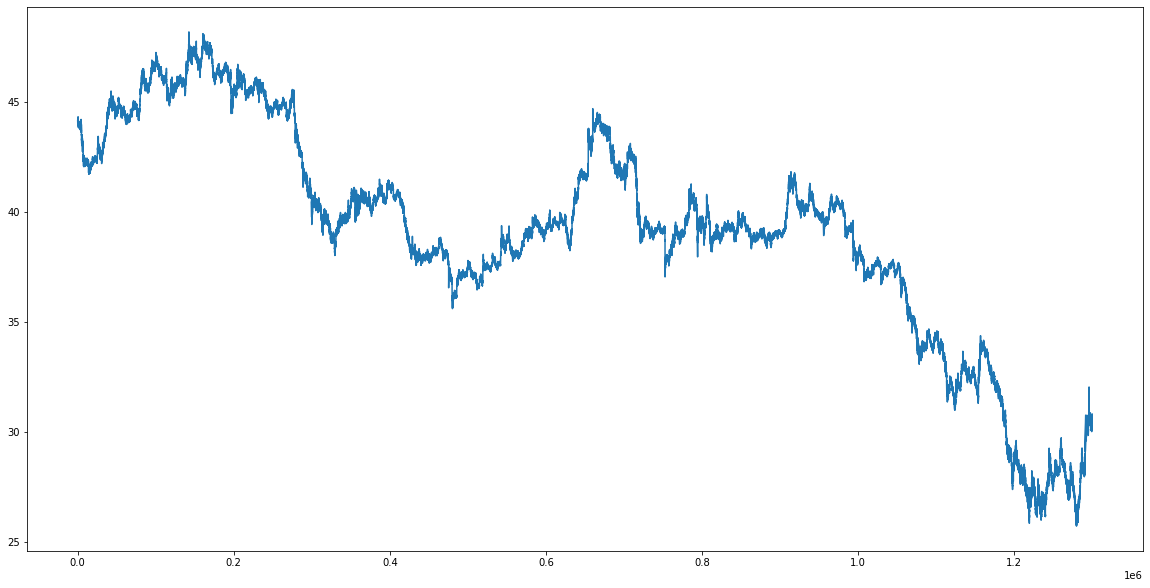

In [145]:
plt.figure(figsize=(20,10))
plt.plot(bids_weighted_sum) 

In [35]:
dataset['bid_price_0']

,nunique,mean,median,std,min,max,first,last
0,7,44.183379,44.1865,0.007340,44.171,44.190,44.171,44.190
1,1,44.190000,44.1900,0.000000,44.190,44.190,44.190,44.190
2,3,44.187467,44.1860,0.001767,44.186,44.190,44.190,44.186
3,3,44.181038,44.1860,0.006993,44.173,44.188,44.186,44.188
4,2,44.213095,44.2190,0.012474,44.188,44.219,44.188,44.219
...,...,...,...,...,...,...,...,...
1299995,1,30.777000,30.7770,0.000000,30.777,30.777,30.777,30.777
1299996,1,30.777000,30.7770,0.000000,30.777,30.777,30.777,30.777
1299997,5,30.780052,30.7810,0.002787,30.777,30.784,30.777,30.783
1299998,8,30.786015,30.7860,0.003217,30.782,30.793,30.783,30.793


In [3]:
class Dataloader():
    def __init__(
        self, 
        dataframe: pd.DataFrame, 
        window_size: int, 
        step_size: int,
        horizon: int,
        first_pred: int
    ):
        self.df = dataframe
        self.window_size = window_size
        self.step_size = step_size
        self.horizon = horizon
        self.first_pred = first_pred
        assert self.first_pred > self.window_size
        feat_idx = []
        target_idx = []
        for i in range(self.first_pred, self.df.shape[0], self.step_size):
            feat_idx.append(range(i-self.horizon-self.window_size+1, i-self.horizon+1))
            target_idx.append(i)
        self.feat_idx = feat_idx
        self.target_idx = target_idx
    
    def __len__(self):
        return len(self.feat_idx)
    
    def __iter__(self):
        self.iter = 0
        return self

    def __next__(self):
        if self.iter < len(self.feat_idx):
            feat = self.df.iloc[self.feat_idx[self.iter]]
            target = self.df.iloc[self.target_idx[self.iter], -1]
            self.iter += 1
            return feat, target
        else:
            raise StopIteration

In [4]:
my_list = list(dataset)
features = my_list[:-1]

In [7]:
features[:5]

[('bid_price_0', 'nunique'),
 ('bid_price_0', 'mean'),
 ('bid_price_0', 'median'),
 ('bid_price_0', 'std'),
 ('bid_price_0', 'min')]

In [5]:
import importlib
#import risk_instruments
import pandas as pd
import numpy as np
import os
import sys
import pandas as pd
import seaborn as sns


##from risk_instruments.database import DBconnect
#from risk_instruments.universal_analysis import woe_stab, woe_line
#from risk_instruments.express_analysis import gain_chart
#from configures import user, password
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, log_loss
from sklearn.pipeline import Pipeline
from IPython.core.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats.distributions import chi2
from matplotlib import pyplot as plt
from scipy.stats import bernoulli, norm

In [23]:
features

[('bid_price_0', 'nunique'),
 ('bid_price_0', 'mean'),
 ('bid_price_0', 'median'),
 ('bid_price_0', 'std'),
 ('bid_price_0', 'min'),
 ('bid_price_0', 'max'),
 ('bid_price_0', 'first'),
 ('bid_price_0', 'last'),
 ('bid_quantity_0', 'sum'),
 ('bid_quantity_0', 'nunique'),
 ('bid_quantity_0', 'mean'),
 ('bid_quantity_0', 'median'),
 ('bid_quantity_0', 'std'),
 ('bid_quantity_0', 'min'),
 ('bid_quantity_0', 'max'),
 ('bid_quantity_0', 'first'),
 ('bid_quantity_0', 'last'),
 ('bid_price_1', 'nunique'),
 ('bid_price_1', 'mean'),
 ('bid_price_1', 'median'),
 ('bid_price_1', 'std'),
 ('bid_price_1', 'min'),
 ('bid_price_1', 'max'),
 ('bid_price_1', 'first'),
 ('bid_price_1', 'last'),
 ('bid_quantity_1', 'sum'),
 ('bid_quantity_1', 'nunique'),
 ('bid_quantity_1', 'mean'),
 ('bid_quantity_1', 'median'),
 ('bid_quantity_1', 'std'),
 ('bid_quantity_1', 'min'),
 ('bid_quantity_1', 'max'),
 ('bid_quantity_1', 'first'),
 ('bid_quantity_1', 'last'),
 ('bid_price_2', 'nunique'),
 ('bid_price_2', 'mean'

In [ ]:
features = []

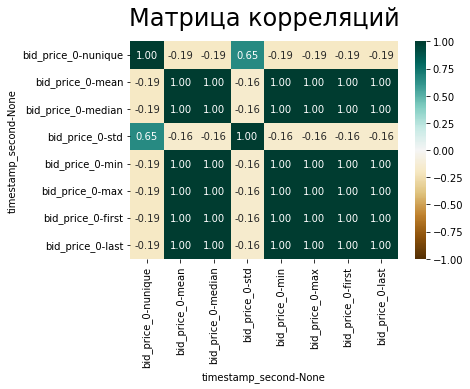

In [27]:
heatmap = sns.heatmap((dataset[features[:8]]).corr(), mask=None, vmin=-1, vmax=1, annot=True, cmap='BrBG', fmt=".2f")
heatmap.set_title('Матрица корреляций', fontdict={'fontsize':24}, pad=16);

Column **price** represents the price at moment **t**. The task is to predict **price** values at moment **t+60**.

The forecasting problem is defined as follows. Consider the multivariate time series of features (exogenous variables) $X_0, X_1, \dots $ where $X_i \in \mathbb{R}^d$. Consider the univariate time series of targets (endogenous variables) $y_0, y_1, ...$ where $y_i \in \mathbb{R}$. The task is to predict the $y_{T+h}$ where $T \in \{1000, 1001, \dots\}$ is the last available time stamp and $h = 60$ is the forecasting horizon by the given _sliding window_ over pairs $(X, y)_{T-N+1}, (X, y)_{T-N+2}, \dots, (X, y)_T$ with the selected window size $1 \leq N \leq 1000$. The optimization problem is minimizing the mean squared error between predictions and targets.

Select the window size appropriately to your solution.

In [4]:
window_size = 1

In [5]:
assert (1 <= window_size) and (window_size <= 1000)

The dataloader defines the forecasting problem with the selected window size.

**Remark**: first 1060 observations in both test datasets will not be scored.

In [6]:
loader = Dataloader(
    dataframe=dataset, 
    window_size=window_size, 
    step_size=1, 
    horizon=60, 
    first_pred=1060)

for feat, target in loader:
    break
feat.shape, target

((1, 210), 44.0695)

Define your forecasting model. You can install necessary libraries by `!pip install ... `. You can find installed packages in [requirements](https://github.com/vpozdnyakov/EvalAI/blob/master/requirements/worker.txt). Here is also CPU version of `torch==1.10.2`. Do not train the model here, instead download the weights of a pretrained model from your own cloud service, e.g. google drive by `gdown` as follows:

```python
!pip install gdown==4.2.0 -q
url = ...
gdown.download(url, 'model_scripted.pt', fuzzy=True)
model = torch.jit.load('model_scripted.pt')
```

You can change the template by adding additional methods, parameters, etc.

In [7]:
class ForecastingModel():
    # Naive forecasting model
    def __init__(self):
        pass
    def forecast(self, feat):
        return feat.iloc[-1, -1]

model = ForecastingModel()

In **forecast** function you can do preprocessing, e.g. deletion unnecessary data or aggregation.

In [8]:
def forecast(feat):
    return model.forecast(feat)

Scoring the model.

In [9]:
pred = []
target = []
for feat, _target in loader:
    pred.append(forecast(feat))
    target.append(_target)
mse(pred, target)

0.005813036416809094

Let us draw the forecast visualization.

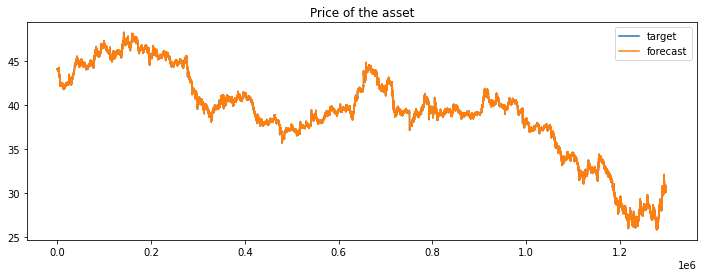

In [10]:
plt.figure(figsize=(12, 4))
plt.plot(target, label='target')
plt.plot(pred, label='forecast')
plt.title('Price of the asset')
plt.legend()
plt.show()

Example of 1000 forecasts.

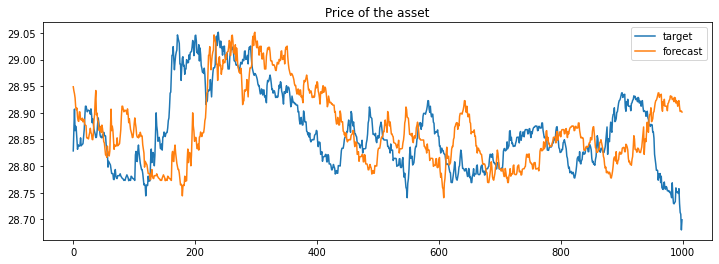

In [11]:
plt.figure(figsize=(12, 4))
plt.plot(target[-100000:-99000], label='target')
plt.plot(pred[-100000:-99000], label='forecast')
plt.title('Price of the asset')
plt.legend()
plt.show()